# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_data.shape)
print(f"The data file has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

(4324, 9)
The data file has 4324 rows and 9 columns


In [7]:
print(f"The column names are:\n{df_data.columns}")

The column names are:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [8]:
print(f"There are NaN values: {df_data.isna().values.any()}")
print(f"There are {df_data.isna().values.sum()} NaN values")

print(f"There are duplicates: {df_data.duplicated().values.any()}")

There are NaN values: True
There are 3360 NaN values
There are duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [9]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [11]:
df_data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [13]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
launches = df_data.Organisation.value_counts()

In [15]:
bar = px.bar(x=launches.index, y=launches.values, title="Number of Space Mission Launches")
bar.update_layout(xaxis_title="Organisation", yaxis_title="Number of Launches")
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [16]:
rocket_status = df_data["Rocket_Status"].value_counts()
print(rocket_status)

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64


In [17]:
print(f"There are {rocket_status.values[0]} rockets with {rocket_status.index[0]} and {rocket_status.values[1]} rockets with {rocket_status.index[1]}")

There are 3534 rockets with StatusRetired and 790 rockets with StatusActive


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mission_status = df_data["Mission_Status"].value_counts()
print(mission_status)

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64


In [19]:
print(f"There were {mission_status.values[0]} successful missions and {mission_status.values[1]+mission_status.values[2]+mission_status.values[3]} failed missions")

There were 3879 successful missions and 445 failed missions


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [20]:
df_data.dropna(inplace=True)

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'

# df_data = df_data.copy()

df_data.Price = df_data.Price.astype(str).str.replace(",", "")
df_data.Price = pd.to_numeric(df_data.Price)

print(df_data.Price.min())
print(df_data.Price.max())

5.3
5000.0


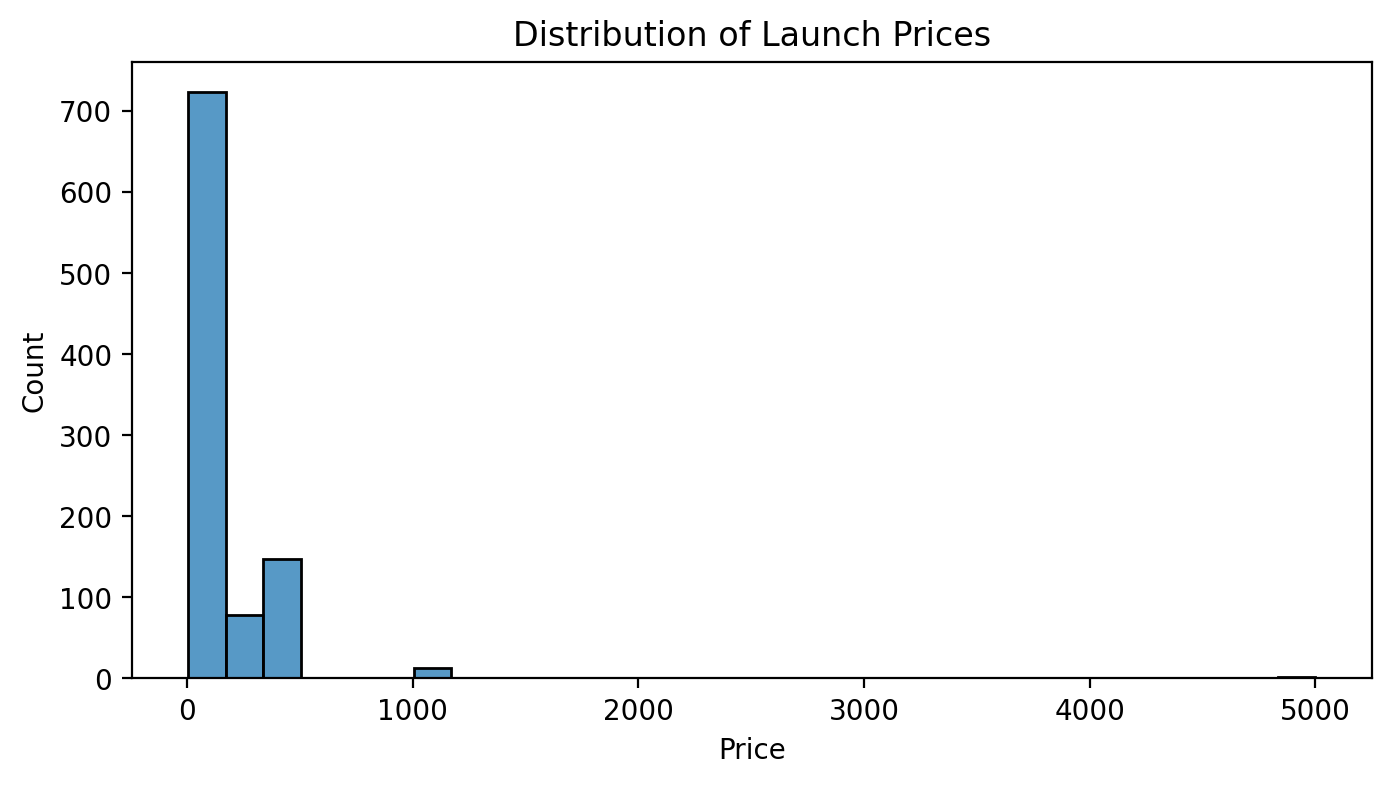

In [22]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data, x=df_data.Price, bins=30)
plt.xlabel("Price")
plt.title("Distribution of Launch Prices")
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
def extract_country(location):
  extract = location.split(",")[-1].strip()
  if extract=="Russia" or extract=="Barents Sea":
    country = "Russian Federation"
  elif extract=="New Mexico" or extract=="Pacific Missile Range Facility" or extract=="Gran Canaria":
    country = "USA"
  elif extract=="Yellow Sea":
    country = "China"
  elif extract=="Shahrud Missile Test Site":
    country = "Iran"
  else:
    country = extract
  return country

df_data["Country"] = df_data["Location"].apply(extract_country)

In [24]:
df_data.Country.value_counts()

USA                   490
China                 159
France                 95
India                  67
Russian Federation     54
Kazakhstan             46
Japan                  40
New Zealand            13
Name: Country, dtype: int64

In [25]:
def country_code(country):
  return countries.get(country).alpha3

df_data["Country_Code"] = df_data["Country"].apply(country_code)

In [26]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [27]:
launches_by_country = df_data.Country_Code.value_counts()
print(launches_by_country)

USA    490
CHN    159
FRA     95
IND     67
RUS     54
KAZ     46
JPN     40
NZL     13
Name: Country_Code, dtype: int64


In [28]:
map_launches_by_country = px.choropleth(launches_by_country, locations=launches_by_country.index, color=launches_by_country.values, color_continuous_scale=px.colors.sequential.matter, labels={"color": "Number of Launches"})
map_launches_by_country.update_layout(coloraxis_showscale=True,)
map_launches_by_country.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [29]:
df_failures = df_data[df_data.Mission_Status!="Success"]
failures_by_country = df_failures.Country_Code.value_counts()
print(failures_by_country)

USA    28
IND     8
CHN     7
FRA     3
KAZ     3
RUS     3
NZL     2
Name: Country_Code, dtype: int64


In [30]:
map_failures_by_country = px.choropleth(failures_by_country, locations=failures_by_country.index, color=failures_by_country.values, color_continuous_scale=px.colors.sequential.matter, labels={"color": "Number of Failures"})
map_failures_by_country.update_layout(coloraxis_showscale=True,)
map_failures_by_country.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [31]:
country_org_status = df_data.groupby(by=["Country", "Country_Code", "Organisation", "Mission_Status"], as_index=False).agg({"Date": pd.Series.count})
country_org_status.head(1)

,Country,Country_Code,Organisation,Mission_Status,Date
0,China,CHN,CASC,Failure,3


In [32]:
burst = px.sunburst(country_org_status, path=["Country_Code", "Organisation", "Mission_Status"], values="Date")
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [33]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [34]:
price_by_org = df_data.groupby(by="Organisation").agg({"Price": pd.Series.sum})

In [35]:
price_by_org.sort_values("Price", ascending=False, inplace=True)
price_by_org

,Price
Organisation,
NASA,"76,280.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
RVSN USSR,"10,000.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"


In [36]:
bar = px.bar(x=price_by_org.index, y=price_by_org.Price, title="Total Amount of Money by Organisation")
bar.update_layout(xaxis_title="Organisation", yaxis_title="Price (dollars)")
bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [37]:
org_count = df_data.Organisation.value_counts()
count_by_org = pd.DataFrame({"Organisation": org_count.index, "Count": org_count.values})

price_by_org_launch = pd.merge(price_by_org, count_by_org, on="Organisation")

price_by_org_launch["Avg_Price_per_Launch"] = price_by_org_launch.Price / price_by_org_launch.Count
price_by_org_launch.sort_values("Avg_Price_per_Launch", ascending=False, ignore_index=True, inplace=True)
price_by_org_launch.head()

,Organisation,Price,Count,Avg_Price_per_Launch
0,RVSN USSR,"10,000.00",2,"5,000.00"
1,NASA,"76,280.00",149,511.95
2,Boeing,"1,241.00",7,177.29
3,Arianespace,"16,345.00",96,170.26
4,ULA,"14,798.00",98,151.00


In [38]:
bar = px.bar(x=price_by_org_launch.Organisation, y=price_by_org_launch["Avg_Price_per_Launch"], title="Avg Amount of Money by Organisation per Launch")
bar.update_layout(xaxis_title="Organisation", yaxis_title="Avg Price per Launch (dollars)")
bar.show()

# Chart the Number of Launches per Year

In [39]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [40]:
print(type(df_data["Date"][0]))

<class 'str'>


In [41]:
pd.options.mode.chained_assignment = None  # default='warn'

df_data["Date"] = pd.to_datetime(df_data["Date"], utc=True)
print(type(df_data["Date"][0]))
df_data.head(1)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [42]:
df_data["Year"] = pd.DatetimeIndex(df_data.Date).year
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020


In [43]:
launches_per_year = df_data[["Year", "Date"]].groupby(by="Year").count()
launches_per_year.rename(columns={"Date": "Launches"}, inplace=True)
launches_per_year.head()

,Launches
Year,
1964,2
1965,2
1966,3
1967,8
1968,10


In [44]:
bar = px.bar(x=launches_per_year.index, y=launches_per_year.Launches, title="Launches per Year")
bar.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [45]:
df_data["Month"] = pd.DatetimeIndex(df_data.Date).month
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8


In [46]:
df_monthly = df_data[["Date", "Month"]].resample("M", on="Date").count()
df_monthly.rename(columns={"Month": "Launches"}, inplace=True)
df_monthly.head()

,Launches
Date,
1964-09-30 00:00:00+00:00,1
1964-10-31 00:00:00+00:00,0
1964-11-30 00:00:00+00:00,0
1964-12-31 00:00:00+00:00,1
1965-01-31 00:00:00+00:00,0


In [47]:
print("The months with the highest number of launches are:")
df_monthly[df_monthly.Launches==df_monthly.Launches.max()]

The months with the highest number of launches are:


,Launches
Date,
2017-06-30 00:00:00+00:00,12
2020-07-31 00:00:00+00:00,12


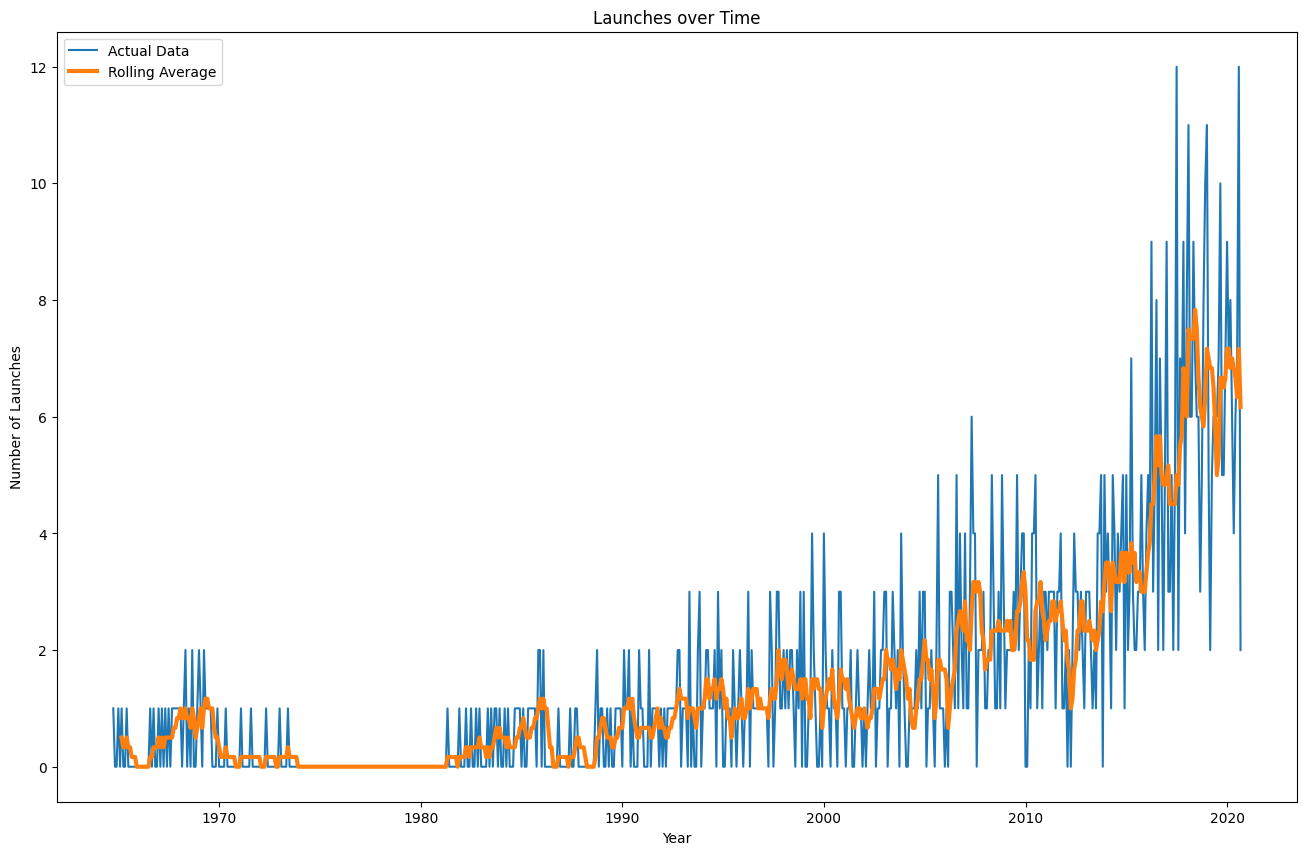

In [48]:
plt.figure(figsize=(16,10))
plt.plot(df_monthly.index, df_monthly.Launches, label="Actual Data")
plt.title("Launches over Time")
plt.xlabel("Year")
plt.ylabel("Number of Launches")

roll_df = df_monthly.rolling(window=6).mean()
plt.plot(df_monthly.index, roll_df.Launches, linewidth=3, label="Rolling Average")
plt.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [49]:
df_monthly["Month"] = pd.DatetimeIndex(df_monthly.index).month
launches_per_month = df_monthly.groupby(by="Month").sum()
launches_per_month

,Launches
Month,
1,66
2,60
3,77
4,91
5,86
6,85
7,77
8,82
9,88


In [50]:
print("The most popular months for launches are:")
print(launches_per_month[launches_per_month.Launches==launches_per_month.Launches.max()])

print("The least popular months for launches are:")
print(launches_per_month[launches_per_month.Launches==launches_per_month.Launches.min()])

The most popular months for launches are:
       Launches
Month          
12           92
The least popular months for launches are:
       Launches
Month          
2            60


In [51]:
bar = px.bar(x=launches_per_month.index, y=launches_per_month.Launches, title="Total Launches per Month")
bar.update_layout(xaxis_title="Month", yaxis_title="Total Number of Launches")
bar.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [52]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8


In [53]:
df_monthly_price = df_data[["Date", "Price"]].resample("M", on="Date").sum()
df_monthly_price.head()

,Price
Date,
1964-09-30 00:00:00+00:00,63.23
1964-10-31 00:00:00+00:00,0.00
1964-11-30 00:00:00+00:00,0.00
1964-12-31 00:00:00+00:00,63.23
1965-01-31 00:00:00+00:00,0.00


In [54]:
avg_launch_price = pd.merge(df_monthly, df_monthly_price, on="Date")
avg_launch_price["Avg_Price_per_Launch"] = avg_launch_price.Price / avg_launch_price.Launches
avg_launch_price.fillna(0, inplace=True)
avg_launch_price.head()

,Launches,Month,Price,Avg_Price_per_Launch
Date,,,,
1964-09-30 00:00:00+00:00,1,9,63.23,63.23
1964-10-31 00:00:00+00:00,0,10,0.00,0.00
1964-11-30 00:00:00+00:00,0,11,0.00,0.00
1964-12-31 00:00:00+00:00,1,12,63.23,63.23
1965-01-31 00:00:00+00:00,0,1,0.00,0.00


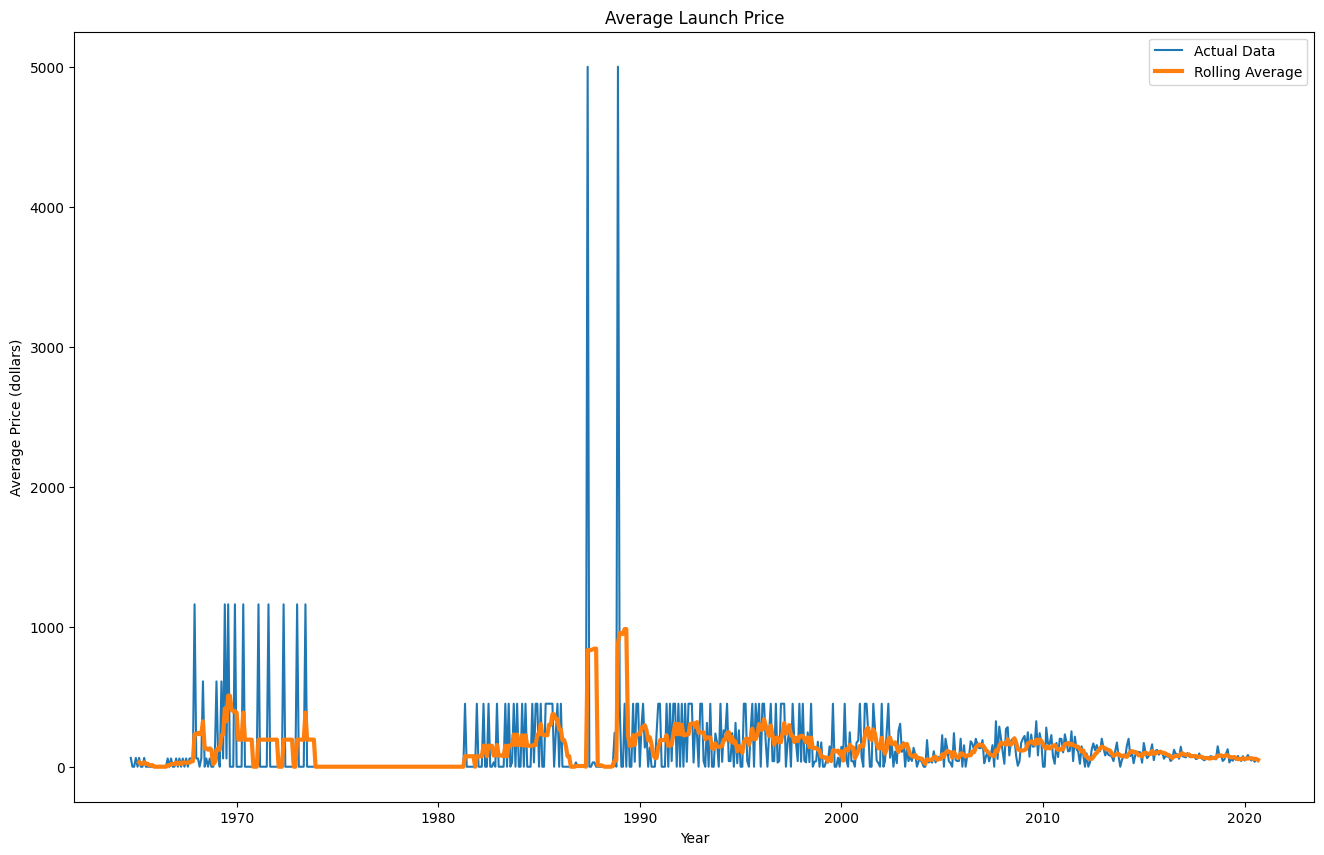

In [55]:
plt.figure(figsize=(16,10))
plt.plot(avg_launch_price.index, avg_launch_price.Avg_Price_per_Launch, label="Actual Data")
plt.title("Average Launch Price")
plt.xlabel("Year")
plt.ylabel("Average Price (dollars)")

roll_df_avg = avg_launch_price.rolling(window=6).mean()
plt.plot(avg_launch_price.index, roll_df_avg.Avg_Price_per_Launch, linewidth=3, label="Rolling Average")
plt.legend()
plt.show()

In [56]:
avg_launch_price[avg_launch_price.Avg_Price_per_Launch==avg_launch_price.Avg_Price_per_Launch.max()]

,Launches,Month,Price,Avg_Price_per_Launch
Date,,,,
1987-05-31 00:00:00+00:00,1,5,"5,000.00","5,000.00"
1988-11-30 00:00:00+00:00,1,11,"5,000.00","5,000.00"


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [57]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8


In [58]:
top_orgs = df_data.groupby(by="Organisation").agg({"Date": pd.Series.count})
top_orgs.rename(columns={"Date": "Launches"}, inplace=True)
top_orgs.sort_values(by="Launches", ascending=False, inplace=True)
top_10 = top_orgs[:10]
top_10

,Launches
Organisation,
CASC,158
NASA,149
SpaceX,99
ULA,98
Arianespace,96
Northrop,83
ISRO,67
MHI,37
VKS RF,33


In [59]:
df_top10 = df_data[df_data.Organisation.isin(top_10.index)]
df_top10.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,2020,7
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,USA,2020,7


In [60]:
top10_by_year = df_top10.groupby(by=["Year", "Organisation"], as_index=False).agg({"Date": pd.Series.count})
top10_by_year.rename(columns={"Date": "Launches"}, inplace=True)
top10_by_year.head()

,Year,Organisation,Launches
0,1964,US Air Force,2
1,1965,US Air Force,2
2,1966,US Air Force,3
3,1967,NASA,1
4,1967,US Air Force,7


In [61]:
s_bar = px.bar(top10_by_year, x="Year", y="Launches", title="Launches by Top 10 Organisations", color="Organisation", barmode="stack")
s_bar.update_layout(xaxis_title="Year", yaxis_title="Launches")
s_bar.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [62]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8


In [63]:
df_coldwar = df_data[df_data.Country.isin(["USA", "Russian Federation", "Kazakhstan"])]
df_coldwar.Country.value_counts()

USA                   490
Russian Federation     54
Kazakhstan             46
Name: Country, dtype: int64

In [64]:
def USSR(country):
  if country=="Russian Federation" or country=="Kazakhstan":
    country = "USSR"
  return country

df_coldwar["Country"] = df_coldwar["Country"].apply(USSR)

In [65]:
df_coldwar_period = df_coldwar[df_coldwar.Year < 1992]
df_coldwar_period.Country.value_counts()

USA     90
USSR     2
Name: Country, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [66]:
USSR_US_launches = df_coldwar.Country.value_counts()
USSR_US_launches

USA     490
USSR    100
Name: Country, dtype: int64

In [67]:
fig = px.pie(labels=USSR_US_launches.index, values=USSR_US_launches.values, title="Total Launches", names=USSR_US_launches.index)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [68]:
df_USA = df_coldwar[df_coldwar.Country=="USA"]
USA = df_USA.groupby(by="Year").agg({"Date": pd.Series.count})
USA.rename(columns={"Date": "Launches"}, inplace=True)

df_USSR = df_coldwar[df_coldwar.Country=="USSR"]
USSR = df_USSR.groupby(by="Year").agg({"Date": pd.Series.count})
USSR.rename(columns={"Date": "Launches"}, inplace=True)

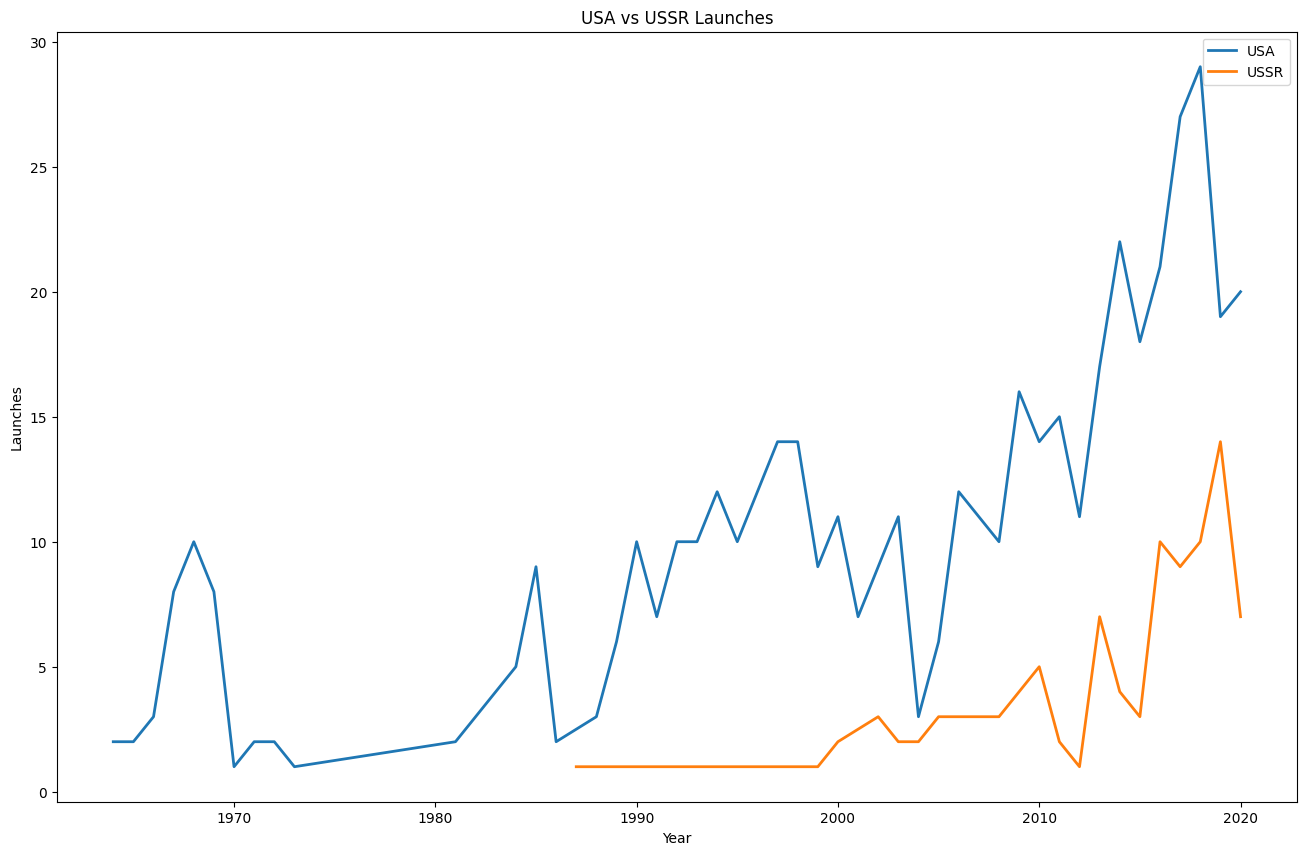

In [69]:
plt.figure(figsize=(16,10))
plt.plot(USA.index, USA.Launches, linewidth=2, label="USA")
plt.plot(USSR.index, USSR.Launches, linewidth=2, label="USSR")
plt.title("USA vs USSR Launches")
plt.xlabel("Year")
plt.ylabel("Launches")
plt.legend()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [70]:
df_coldwar["Mission_Status"].value_counts()

Success              556
Failure               23
Partial Failure       10
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

In [71]:
df_failures = df_coldwar[df_coldwar["Mission_Status"] != "Success"]

In [72]:
failures = df_failures.groupby(by=["Year", "Country"], as_index=False).agg({"Date": pd.Series.count})
failures.rename(columns={"Date": "Failures"}, inplace=True)

In [73]:
s_bar = px.bar(failures, x="Year", y="Failures", title="Number of Mission Failures", color="Country", barmode="stack")
s_bar.update_layout(xaxis_title="Year", yaxis_title="Failures")
s_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [74]:
total_launches = df_coldwar.groupby(by=["Year", "Country"], as_index=False).agg({"Date": pd.Series.count})
total_launches.rename(columns={"Date": "Total_Launches"}, inplace=True)

In [75]:
failures_percentage = pd.merge(failures, total_launches, on=["Year", "Country"])
failures_percentage["Failures_Percentage"] = failures_percentage.Failures / failures_percentage.Total_Launches * 100

In [76]:
s_bar = px.bar(failures_percentage, x="Year", y="Failures_Percentage", title="Percentage of Failures", color="Country", barmode="stack")
s_bar.update_layout(xaxis_title="Year", yaxis_title="% Failures")
s_bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [77]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8


In [78]:
top_countries = df_data.groupby(by=["Year", "Country"], as_index=False).agg({"Date": pd.Series.count})
top_countries.rename(columns={"Date": "Launches"}, inplace=True)

In [79]:
s_bar = px.bar(top_countries, x="Year", y="Launches", title="Launches by Country", color="Country", barmode="stack")
s_bar.update_layout(xaxis_title="Year", yaxis_title="Launches")
s_bar.show()

In [80]:
df_success = df_data[df_data["Mission_Status"]=="Success"]
top_success = df_success.groupby(by=["Year", "Country"], as_index=False).agg({"Date": pd.Series.count})
top_success.rename(columns={"Date": "Successes"}, inplace=True)

In [81]:
s_bar = px.bar(top_success, x="Year", y="Successes", title="Successes by Country", color="Country", barmode="stack")
s_bar.update_layout(xaxis_title="Year", yaxis_title="Successes")
s_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [82]:
top_organisations = df_data.groupby(by=["Year", "Organisation"], as_index=False).agg({"Date": pd.Series.count})
top_organisations.rename(columns={"Date": "Launches"}, inplace=True)

In [83]:
s_bar = px.bar(top_organisations, x="Year", y="Launches", title="Launches by Organisation", color="Organisation", barmode="stack")
s_bar.update_layout(xaxis_title="Year", yaxis_title="Launches")
s_bar.show()